In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import io
from matplotlib import pyplot as plt

In [2]:
!curl -O 'https://www.w3schools.com/w3images/lights.jpg'
imgpath = 'lights.jpg'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20461  100 20461    0     0  97788      0 --:--:-- --:--:-- --:--:-- 97899


In [3]:
mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]], dtype=np.float32)
mat2 = np.array([[0.707106781,-0.707106781,0],[0.707106781,0.707106781,0],[0,0,1]], dtype=np.float32)
mat3 = np.array([[1.2,0,0],[0,0.8,0],[0,0,1]], dtype=np.float32)

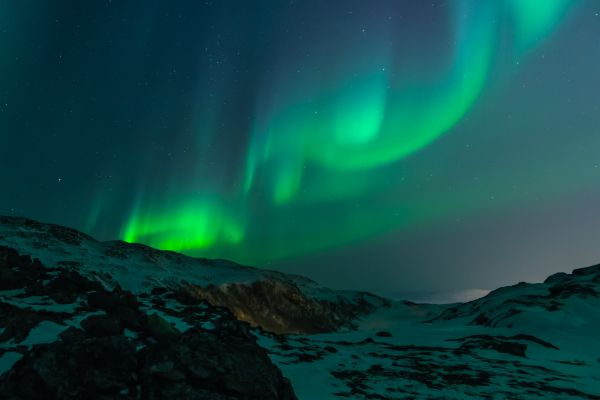

<function destroyAllWindows>

In [4]:
img = cv.imread(imgpath)
cv2_imshow(img)
cv.waitKey
cv.destroyAllWindows

## Transformada Afim

In [5]:
# Decomposição QR
Q,R = np.linalg.qr(mat1)
# Extrair a matriz de transformação afim
matriz_transformacao = Q[:, :2]

In [6]:
def decomposicao_lu(A):
  """
  Calcula a decomposição LU de uma matriz.

  Args:
      A: Matriz quadrada (numpy.ndarray).

  Returns:
      L: Matriz triangular inferior (numpy.ndarray).
      U: Matriz triangular superior (numpy.ndarray).
  """
  n = len(A)
  L = np.eye(n)
  U = np.copy(A)

  for col in range(n - 1):
    for row in range(col + 1, n):
      pivot = U[row, col] / U[col, col]
      L[row, col] = pivot
      U[row, :] -= pivot * U[col, :]

  return L, U

In [7]:
A, T = decomposicao_lu(mat1)

In [8]:
altura,largura, canais = img.shape
nova_img = np.zeros((altura, largura, canais), dtype=np.uint8)

In [150]:
vector = np.vectorize(np.int_)
print(nova_img.shape)
print(img.shape)

for y in range(altura):
    for x in range(largura):
        ponto_original = np.array([x, y, 1], dtype=np.float32)
        ponto_transformado = A.dot(ponto_original) + T

        # Ajustar os valores para caber dentro da nova imagem
        x_transformado = ponto_transformado[0:].astype(int)
        y_transformado = ponto_transformado[1:].astype(int)

        if 0 <= x_transformado.all() < largura and 0 <= y_transformado.all() < altura:
            nova_img[y_transformado[1][1]:,x_transformado[0][0]:] = img[y, x]


(400, 600, 3)
(400, 600, 3)


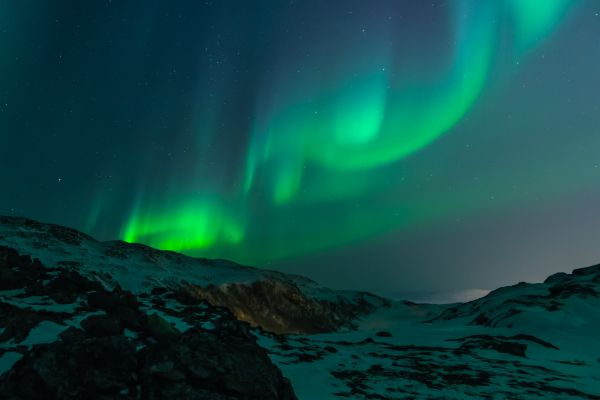

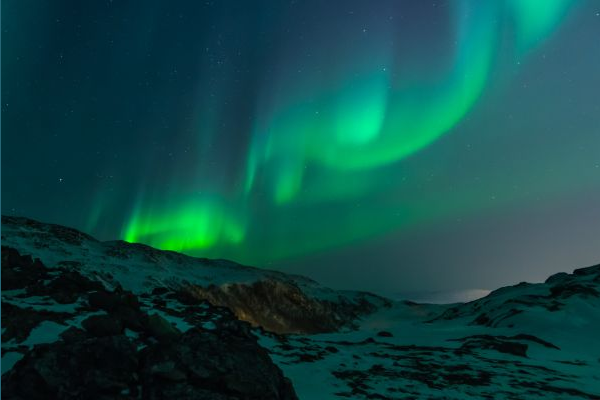

-1

In [151]:
cv2_imshow( img)
cv2_imshow(nova_img)
cv.waitKey(0)